<a href="https://colab.research.google.com/github/achreftel1/adc/blob/main/keras_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step - accuracy: 0.3772 - loss: 1.8021
Epoch 1: val_loss improved from inf to 1.40988, saving model to vgg_model.keras
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 802s 512ms/step - accuracy: 0.3772 - loss: 1.8020 - val_accuracy: 0.5163 - val_loss: 1.4099 - learning_rate: 0.0010
Epoch 2/5
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 9:34 368ms/step - accuracy: 0.5000 - loss: 1.4809

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_loss improved from 1.40988 to 1.40958, saving model to vgg_model.keras
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 143s 91ms/step - accuracy: 0.5000 - loss: 1.4809 - val_accuracy: 0.5164 - val_loss: 1.4096 - learning_rate: 0.0010
Epoch 3/5
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step - accuracy: 0.5069 - loss: 1.4325
Epoch 3: val_loss improved from 1.40958 to 1.33525, saving model to vgg_model.keras
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 819s 499ms/step - accuracy: 0.5070 - loss: 1.4324 - val_accuracy: 0.5406 - val_loss: 1.3353 - learning_rate: 0.0010
Epoch 4/5
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 14:19 550ms/step - accuracy: 0.6562 - loss: 1.2337
Epoch 4: val_loss improved from 1.33525 to 1.33453, saving model to vgg_model.keras
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 143s 91ms/step - accuracy: 0.6562 - loss: 1.2337 - val_accuracy: 0.5408 - val_loss: 1.3345 - learning_rate: 0.0010
Epoch 5/5
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step - accuracy: 0.5264 - loss: 1.3633
Epoch 5: val_loss improved from 1.3345

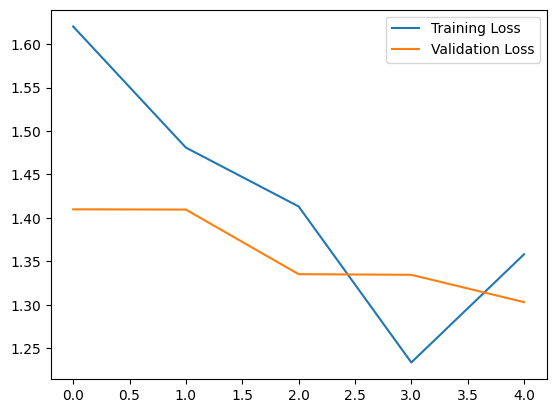

In [1]:
# Import necessary libraries
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import numpy as np

# Load the CIFAR-10 dataset
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Define the VGG model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add new layers on top of the base model
x = base_model.output
x = Flatten()(x)
x = Dense(10, activation='softmax')(x)

# Define the model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define data augmentation
datagen = ImageDataGenerator(rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

# Define callbacks
checkpoint = ModelCheckpoint('vgg_model.keras', monitor='val_loss', verbose=1, save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.001)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

# Train the model
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    steps_per_epoch=int(len(x_train) / 32),
                    epochs=5,
                    validation_data=(x_test, y_test),
                    callbacks=[checkpoint, early_stopping, reduce_lr])

# Plot the error vs epoch graph
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()